# illustrates the use of the `proxy` and `analogs` classes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta

In [3]:
proxies_num = pd.read_excel('./data/ProxiesLIANZSWP.xlsx', sheetname='numerical')

In [4]:
proxies_num.head()

,Site,Lat,Long,Anom,dataset,variable
0,Rarotonga,-21.230000,-159.820000,0.60,ersst,sst
1,Amedee,-22.480000,166.470000,-0.26,ersst,sst
2,Oroko,-43.222615,170.307329,-0.42,ncep,Tmean
3,Greenlaw,-43.006108,171.419497,-0.26,ncep,Tmean
4,Crow,-43.346222,170.998122,-0.62,ncep,Tmean


In [5]:
proxies_cat = pd.read_excel('./data/ProxiesLIANZSWP.xlsx', sheetname='categorical')

In [6]:
proxies_cat.head()

,Site,Lat,Long,Anom,dataset,variable
0,Washington Isl.,4.686322,-160.387482,WB,gpcp,Rain


### add paleopy to the system path

In [7]:
import sys
sys.path.append('/Users/nicolasf/CODE/paleopy/')

In [8]:
from paleopy.core.proxy import proxy 
from paleopy.core.analogs import analogs
from paleopy.plotting.scalar_plot import scalar_plot

### loops over the list of proxies parameters contained in the excel file: numeric

In [9]:
row = proxies_num.iloc[0:1,:]

In [10]:
row

,Site,Lat,Long,Anom,dataset,variable
0,Rarotonga,-21.23,-159.82,0.6,ersst,sst


In [11]:
p = proxy('Rarotonga', -159.82, -21.23, 'ersst', 'sst', 'DJF', value=0.6, calc_anoms=True, detrend=True)

In [12]:
p

In [13]:
p.extract_ts()

In [14]:
p.calculate_season()

In [15]:
p.find_analogs()

In [16]:
p.analog_years

array([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype=int32)

In [18]:
p.analogs

,sst,anomalies,d_sst,d_anomalies,cat
time,,,,,
1982-02-15,26.849999,0.196222,27.308039,0.638992,WA
1997-02-15,27.416666,0.762889,27.416666,0.747619,WA
1999-02-15,27.466666,0.812889,27.405594,0.736547,WA
2000-02-15,27.373333,0.719556,27.281725,0.612678,WA
2001-02-15,27.356666,0.702889,27.234522,0.565475,WA
2006-02-15,27.373333,0.719556,27.098509,0.429462,WA
2009-02-15,27.539999,0.886222,27.173568,0.504521,WA


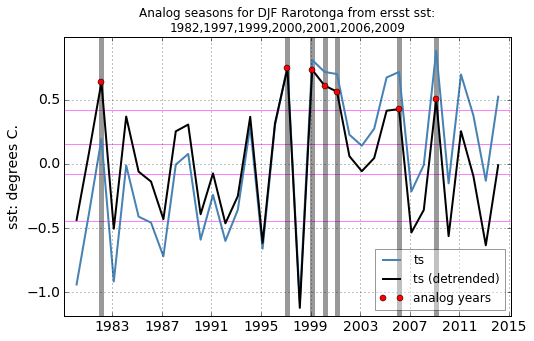

In [19]:
f = p.plot_season_ts()

### loops over the list of proxies parameters contained in the excel file: numerical

In [21]:
for index, row in proxies_num.iterrows():
                
        # initalise a proxy instance, passing all the parameters
        p = proxy(row.Site, row.Long, row.Lat, row.dataset, row.variable, 'DJF', value = row.Anom, \
                  calc_anoms=False, detrend=True)
                                
        # extract the time-series and print the coordinates (passed and extracted)
        p.extract_ts()
        
        print("{}{} --> {}{}: {} km".format(p.sitename, p.coords, p.variable, p.extracted_coords.tolist(), p.distance_point))
        
        # calculates the season statistics
        p.calculate_season()
        
        # find the analog years
        p.find_analogs()
        
        # saves the parameters to file
        p.proxy_repr(outfile=True)
        
        # plot the extracted time-series (raw, detrended) with the analog years
        p.plot_season_ts(fname='./figures/'+p.sitename+".png")

Rarotonga(200.18, -21.23) --> sst[200.0, -22.0]: 87.56368858840081 km
Amedee(166.47, -22.48) --> sst[166.0, -22.0]: 71.98760982961697 km
Oroko(170.307329, -43.222615) --> Tmean[170.0, -42.5]: 84.11208434388203 km
Greenlaw(171.419497, -43.006108) --> Tmean[172.5, -42.5]: 104.57596044098003 km
Crow(170.998122, -43.346222) --> Tmean[170.0, -42.5]: 124.25433418836984 km
Cameron(171.505139, -42.934067) --> Tmean[172.5, -42.5]: 94.46733893961293 km
Avoca(171.405812, -43.043031) --> Tmean[172.5, -42.5]: 107.73975744104352 km
Temple(169.709872, -44.146466) --> Tmean[170.0, -45.0]: 97.58982094997447 km
Hopkins(169.887499, -43.942569) --> Tmean[170.0, -45.0]: 117.84526868991945 km
Turnbull(169.850303, -43.877607) --> Tmean[170.0, -45.0]: 125.29023646426968 km
Jollie(170.33, -43.697778) --> Tmean[170.0, -42.5]: 135.76947455586478 km
Cass(170.315493, -43.652675) --> Tmean[170.0, -42.5]: 130.62568491574098 km
Caples(168.182845, -44.801851) --> Tmean[167.5, -45.0]: 58.084070977038905 km
Fraser(168.1

### print the dictionnary attached to the latest proxy

In [22]:
p

In [23]:
p.proxy_repr(pprint=True)

{
sitename:Taramakau
coords:(171.486667, -42.899444)
season:DJF
dataset:ncep
variable:Tmean
calc_anoms:False
detrend:True
value:-0.69
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[172.5, -42.5]
distance_point:93.90851968394558
trend_params:{'slope': -0.02094457565792025, 'intercept': 56.434411504533585}
category:WB
analog_years:[1983, 1984, 1993, 2003, 2004, 2005, 2007]
}


### loops over the list of proxies parameters contained in the excel file: categorical

In [26]:
for index, row in proxies_cat.iterrows():
                
        # initalise a proxy instance, passing all the parameters
        p = proxy(row.Site, row.Long, row.Lat, row.dataset, row.variable, 'DJF', value = row.Anom, \
                  calc_anoms=True, detrend=True)
                                
        # extract the time-series and print the coordinates (passed and extracted)
        p.extract_ts()
        
        print("{}{} --> {}{}: {} km".format(p.sitename, p.coords, p.variable, p.extracted_coords.tolist(), p.distance_point))
        
        # calculates the season statistics
        p.calculate_season()
        
        # find the analog years
        p.find_analogs()
        
        # saves the parameters to file
        p.proxy_repr(outfile=True)
        
        # plot the extracted time-series (raw, detrended) with the analog years
        p.plot_season_ts(fname='./figures/'+p.sitename+".png")

Washington Isl.(199.612518, 4.686322) --> Rain[198.75, 3.75]: 141.2904361997061 km


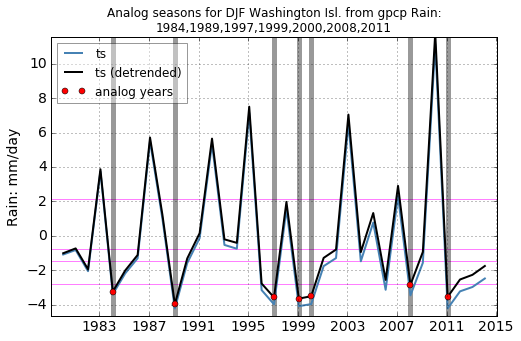

In [27]:
f = p.plot_season_ts(fname=None)

### instantiate the analogs class with the proxy object and the dataset + variable to composite

In [28]:
sst = analogs(p, 'ersst', 'sst').composite()

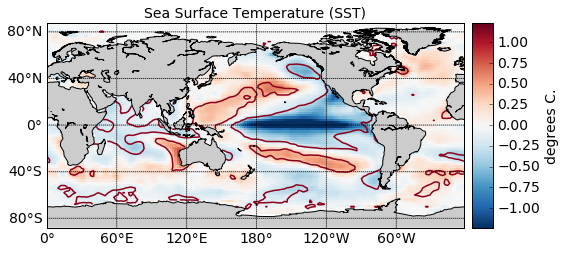

In [30]:
f = scalar_plot(sst, test=0.1, proj='cyl').plot()

In [31]:
uwnd = analogs(p, 'ncep', 'uwnd_200').composite()
# uwnd.close()

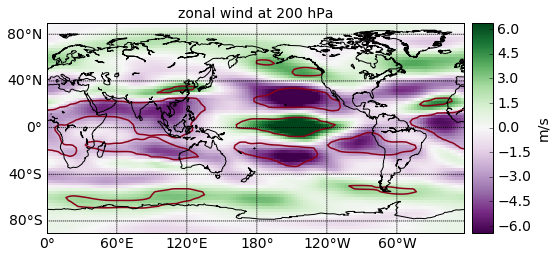

In [33]:
f = scalar_plot(uwnd, test=0.05, proj='cyl').plot()

In [34]:
p.sitename

'Washington Isl.'

In [35]:
p.proxy_repr(pprint=True)

{
sitename:Washington Isl.
coords:(199.612518, 4.686322)
season:DJF
dataset:gpcp
variable:Rain
calc_anoms:True
detrend:True
value:WB
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[198.75, 3.75]
distance_point:141.2904361997061
trend_params:{'slope': -0.019223837085576054, 'intercept': 37.989296836640413}
category:WB
analog_years:[1984, 1989, 1997, 1999, 2000, 2008, 2011]
}
